# Ice Elevation  
This script uses gridded ice elevation data derived from the ATLAS/ICESat-2 L3B Slope-Corrected Land Ice Height Time Series product (https://doi.org/10.5067/ATLAS/ATL15.003). The gridded data was downloaded at a resolution of 1KM, and provides estimates of elevation change relative to 01/01/2020 at 3-monthly intervals. The 'delta_h' band was sampled at T, T5, T10, T15, T20, T25 & T30, within QGIS. This sampled data was saved to a CSV, 'ATL15_delta_h_sampled', which can be found within the 'ice_elevation' folder. The following script uses this output CSV file to plot a timeseries of ice surface elevation between 2018 and 2023.

In [1]:
# IMPORT REQUIRED MODULES 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [4]:
# OPEN THE SAMPLED ATL15 OUTPUT CSV FILE 
ATL15_data = pd.read_csv(r'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/ice_elevation/ATL15_delta_h_sampled.csv')

# DEFINE THE VELOCITY VARIABLE FOR EACH POINT
POINT1_ELEVATION = ATL15_data['POINT_1']
POINT2_ELEVATION = ATL15_data['POINT_2']
POINT3_ELEVATION = ATL15_data['POINT_3']
POINT4_ELEVATION = ATL15_data['POINT_4']
POINT5_ELEVATION = ATL15_data['POINT_5']
POINT6_ELEVATION = ATL15_data['POINT_6']
POINT7_ELEVATION = ATL15_data['POINT_7']

# DEFINE THE DATE VARIABLE
ATL15_data['DATE'] = pd.to_datetime(ATL15_data['DATE'], format='%d/%m/%Y')

# INPUT DESIRED X AXIS, Y AXIS, AND PLOT TITLES
xtitle = 'Date'
ytitle = 'Ice elevation relative to 01/2020 (m)'
title = 'Jakobshavn Isbræ Ice Elevation (2018-2023)'

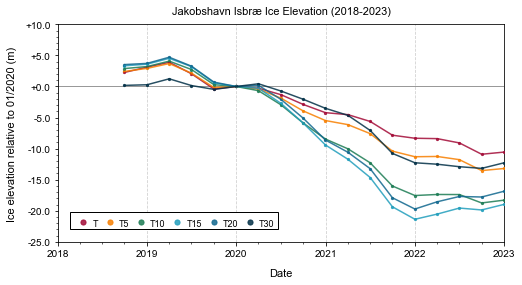

In [8]:
# CREATE A PLOT WITH GRID LINES
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(8, 4))
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) # Add a horizontal line at 0.
plt.title(title, pad=10, fontsize=11)
plt.grid(axis = 'x', alpha=0.6, linestyle='--')
plt.ylabel(ytitle, labelpad=8, fontsize=11)
plt.xlabel(xtitle, labelpad=10, fontsize=11)

# PLOT A SCATTER PLOT FOR EACH POINT
sc1 = plt.scatter(ATL15_data['DATE'], POINT1_ELEVATION, color='#a30b37', s=5, marker='o', alpha=0.85, label='T', zorder=20)
sc2 = plt.scatter(ATL15_data['DATE'], POINT2_ELEVATION, color='#f77f00', s=5, marker='o', alpha=0.85, label='T5', zorder=20)
sc3 = plt.scatter(ATL15_data['DATE'], POINT3_ELEVATION, color='#1c7c54', s=5, marker='o', alpha=0.85, label='T10', zorder=20)
sc4 = plt.scatter(ATL15_data['DATE'], POINT4_ELEVATION, color='#219ebc', s=5, marker='o', alpha=0.85, label='T15', zorder=20)
sc5 = plt.scatter(ATL15_data['DATE'], POINT5_ELEVATION, color='#10678e', s=5, marker='o', alpha=0.85, label='T20', zorder=20)
sc6 = plt.scatter(ATL15_data['DATE'], POINT7_ELEVATION, color='#023047', s=5, marker='o', alpha=0.85, label='T30', zorder=20)

# PLOT A LINE PLOT FOR EACH POINT
plt.plot(ATL15_data['DATE'], POINT1_ELEVATION, color='#a30b37', alpha=0.85, label='T', zorder=20)
plt.plot(ATL15_data['DATE'], POINT2_ELEVATION, color='#f77f00', alpha=0.85, label='T5', zorder=20)
plt.plot(ATL15_data['DATE'], POINT3_ELEVATION, color='#1c7c54', alpha=0.85, label='T10', zorder=20)
plt.plot(ATL15_data['DATE'], POINT4_ELEVATION, color='#219ebc', alpha=0.85, label='T15', zorder=20)
plt.plot(ATL15_data['DATE'], POINT5_ELEVATION, color='#10678e', alpha=0.85, label='T20', zorder=20)
plt.plot(ATL15_data['DATE'], POINT7_ELEVATION, color='#023047', alpha=0.85, label='T30', zorder=20)

# FORMAT THE Y-AXIS TICK LIMITS  
min_y_value = -25
max_y_value = 10
interval_y = 5

def format_y_ticks(y, pos):
    if y >= 0:
        return f'+{y:.1f}'  # Add a '+' sign for non-negative values
    else:
        return f'{y:.1f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))
plt.ylim(bottom=min_y_value, top=max_y_value)
plt.yticks(np.arange(min_y_value, max_y_value+0.1, interval_y))
minor_locator = ticker.MultipleLocator(base=1)
ax.yaxis.set_minor_locator(minor_locator)

# DEFINE THE FORMATTING FOR THE X-TICKS
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)

# ADD A LEGEND WITH THREE COLUMNS, HORIZONTAL ARRANGEMENT, AND WHITE BACKGROUND
legend = plt.legend(handles=[sc1, sc2, sc3, sc4, sc5, sc6], loc='lower left', ncol=6, columnspacing=0.3, markerscale=2.3,
                    frameon=True, framealpha=1, handletextpad=0.01, handleheight=0.1, fontsize=9,
                    facecolor='white', borderaxespad=1.4, borderpad=0.45, fancybox=False)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1)
legend.set_zorder(20)
for text in legend.get_texts():
    text.set_va('center')